# ESCORTS STOCK TRADING OPEN PRICE(ALGORITHMIC TRADING)
AUTHOR : SHUBHAM GONDRALWAR

DATE WRITTEN: 26th MAY 2020

The project is adressed with the aim of predicting the escorts ltd stock open price with the help of machine learning model which helps regular investors to assess their risks and avoid loss situations.

Model building starts with extracting data of stock markets of different countries which enables us to find the escorts trading day open price(Open price refers to the price when the trading starts on particular day).

Next step is to load the dataset extracted from yahoo finance using pandas and extracting meaningful insights by visualisation using seaborn and matplotlib.

Feature engineering and Feature selection are the most useful techniques used in order to make data meaningful for the machine learning model followed by Hyperparameter tuning.

The model is finalised based on the perfomance of the model in cross validation the data used for testing and LIVE DATA AS WELL.

In order to make it usable for the end user the web application is  made using python(Flask) as an API where the user needs to input the required data in order to get the stock open price of ESCORTS LTD.

# SO LET'S GET STARTED

In [61]:
# WE WILL START BY IMPORTING ALL THE LIBRARIES REQUIRED FOR MODEL BUILDING.
import numpy as np # for numerical operation if any
import pandas as pd # mainly used for loading dataset and to handle dataframe operations
import matplotlib.pyplot as plt # for visulaisation
import seaborn as sns # for visulisation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import math
import datetime
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets.

The first dataset we are going to start with contains features of Escort and nifty stock market and also contains US closing index of previous day( closing price of the previous day) followed by  australia, hongkong,china,japan stock open prices on the same day.

In [62]:
escort = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/escort.csv")#escort,us,nifty.
escort.tail(10)
#escort.shape

,Date,escortstckopen,Adj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose
2269,16-03-2020,641.299988,633.700012,2871.522949,6785.100098,24032.91016,19867.11914,9955.200195,7874.879883
2270,17-03-2020,659.700012,648.900024,2895.340088,6794.200195,23063.57031,19416.06055,9197.400391,6904.589844
2271,18-03-2020,539.900024,576.450012,2894.800049,6821.700195,23263.73047,18559.63086,8967.049805,7334.779785
2272,19-03-2020,584.700012,573.599976,2891.555908,6804.899902,22291.82031,17431.05078,8468.799805,6989.839844
2273,20-03-2020,607.650024,675.150024,2898.050049,6684.100098,21709.13086,17002.03906,8263.450195,7150.580078
2274,23-03-2020,594.099976,550.750000,2870.342041,6690.600098,22805.07031,17011.52930,8745.450195,6879.520020
2275,24-03-2020,577.000000,633.750000,2868.458984,6733.500000,21696.13086,16726.55078,7610.250000,6860.669922
2276,25-03-2020,647.000000,646.900024,2875.417969,6735.700195,22663.49023,16552.83008,7801.049805,7417.859863
2277,26-03-2020,670.000000,663.200012,2898.575928,6826.399902,23527.18945,16887.77930,8317.849609,7384.299805
2278,27-03-2020,624.000000,654.799988,2883.738037,6817.600098,23352.33984,18092.34961,8641.450195,7797.540039


In [63]:
hongkong = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/hongkong.csv")#hangseng market index
hongkong.head()
#hongkong.shape

,Date,hangopen
0,03-01-2011,23135.64063
1,04-01-2011,23477.31055
2,05-01-2011,23650.17969
3,06-01-2011,23861.22070
4,07-01-2011,23744.02930


In [64]:
austrilia = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/australia.csv")#austrilia markey index
austrilia.head()
#austrilia.shape

,Date,austopen
0,31-12-2010,4787.500000
1,04-01-2011,4758.299805
2,05-01-2011,4738.600098
3,06-01-2011,4717.700195
4,07-01-2011,4717.799805


In [65]:
nikkie = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nikkie.csv")#japan index
nikkie.head()
#nikkie.shape

,Date,nikkiesopen
0,04-01-2011,10352.19043
1,05-01-2011,10387.95020
2,06-01-2011,10477.51953
3,07-01-2011,10506.71973
4,11-01-2011,10484.62012


In [66]:
sanghai = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/sanghai.csv")#china market index
sanghai.head()
#sanghai.shape

,Date,sangaiopen
0,31-12-2010,2759.162109
1,04-01-2011,2825.329102
2,05-01-2011,2833.115967
3,06-01-2011,2838.435059
4,07-01-2011,2820.665039


In [67]:
nifty = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nifty50.csv")#niftyopen
nifty.head()
nifty.shape

(2316, 2)

# FEATURE ENGINEERING

SINCE IT IS REQUIRED TO ANALYZE ALL COUNTRIES INDEX PRICES WHICH MAY ULTIMATELY INFLUENCE OUR ESCORTS OPEN PRICE, LET US MERGE ALL THE LOADED DATASET ABOVE FOR FURTHER ANALYSIS.
SINCE DATE IS THE ONLY FEATURE WHICH IS COMMOM TO ALL INDEXES IT IS BETTER TO MERGE WITH IT(DATE).

NOTE: ONLY THOSE STOCK INDEXES ARE TAKEN WHOSE MARKET OPENS BEFORE INDIAN MARKET EXCEPT UNITED STATE'S NASDAQ'S ( WHOSE PREVIOUS DAY CLOSING INDEX IS CONSIDERED).

In [68]:
df1 = pd.merge(escort,hongkong,how = "inner",on = "Date")
df2 = pd.merge(df1,austrilia,how = "inner",on = "Date")
df3 = pd.merge(df2,nifty,how = "inner",on = "Date")
df4 = pd.merge(df3,nikkie,how = "inner",on = "Date")
df5 = pd.merge(df4,sanghai,how = "inner",on = "Date")

In [69]:
escort_main = df5

In [70]:

escort_main.tail()

,Date,escortstckopen,Adj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
1954,23-03-2020,594.099976,550.750000,2870.342041,6690.600098,22805.07031,17011.52930,8745.450195,6879.520020,21696.13086,4753.899902,7945.700195,16570.57031,2677.590088
1955,24-03-2020,577.000000,633.750000,2868.458984,6733.500000,21696.13086,16726.55078,7610.250000,6860.669922,22497.57031,4546.000000,7848.299805,17206.88086,2703.019043
1956,25-03-2020,647.000000,646.900024,2875.417969,6735.700195,22663.49023,16552.83008,7801.049805,7417.859863,23255.91016,4735.700195,7735.149902,18446.80078,2775.302979
1957,26-03-2020,670.000000,663.200012,2898.575928,6826.399902,23527.18945,16887.77930,8317.849609,7384.299805,23604.83008,4998.100098,8451.000000,19234.76953,2761.895996
1958,27-03-2020,624.000000,654.799988,2883.738037,6817.600098,23352.33984,18092.34961,8641.450195,7797.540039,23768.41016,5113.299805,8949.099609,19021.97070,2792.983887


In [71]:
escort_main = df5
escort_main.shape

(1959, 14)

In [72]:
escort_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1958
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1959 non-null   object 
 1   escortstckopen  1953 non-null   float64
 2   Adj Close       1959 non-null   float64
 3   sangaiclose     1958 non-null   float64
 4   aust close      1954 non-null   float64
 5   hangsangclose   1953 non-null   float64
 6   nkkiesclose     1945 non-null   float64
 7   nifty50 close   1944 non-null   float64
 8   usclose         1959 non-null   float64
 9   hangopen        1955 non-null   float64
 10  austopen        1955 non-null   float64
 11  niftyopen       1951 non-null   float64
 12  nikkiesopen     1944 non-null   float64
 13  sangaiopen      1958 non-null   float64
dtypes: float64(13), object(1)
memory usage: 229.6+ KB


The ESCORTS_MAIN NAMED IS THE FINAL DATASET FOR WHICH ANALYSIS NEEDS TO BE DONE WHICH HAS 1959 ROWS AND 14 COLUMNS FROM WHICH STOCKOPEN IS THE DEPENDENT VARIABLE AND REMAINING ARE INDEPEDENT VARIABLE.
ALSO IT CAN BE CLEARLY SEEN THAT DATE IS OBJECT DATATYPE AND REMAINING ARE FLOAT TYPE SO DATE MUST BE CONVERTED TO DATETIME VARIABLE.


CONVERTING DATE OBJECT TO DATETIME VARIABLE FOLLOWED BY SPLITTING THEM INTO DAY MONTH AND YEAR AS MACHINE LEARNING MODEL CANNIT LEARN OBJECT DATATYE.

In [73]:
escort_main["Date"] = pd.to_datetime(escort_main["Date"])#converted to datetime variable
escort_main["month"] = escort_main["Date"].dt.month
escort_main["day"] = escort_main["Date"].dt.day
escort_main["year"] = escort_main["Date"].dt.year

In [74]:
escort_main.head()

,Date,escortstckopen,Adj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen,month,day,year
0,2011-04-01,182.399994,165.670425,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102,4,1,2011
1,2011-05-01,179.800003,163.068283,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967,5,1,2011
2,2011-06-01,168.750000,153.527023,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059,6,1,2011
3,2011-07-01,164.050003,147.135773,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039,7,1,2011
4,2011-11-01,157.000000,141.338013,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074,11,1,2011



# MISSING VALUE ANALYISIS


THE MISSING VALUES STARTS WITH FINDING OUT WHEATHER THERE IS ANY REASON FOR MISSING DATA AND HOW MUCH PERCENTAGE IS MISSING.

In [75]:
escort_main.isnull().mean()

Date              0.000000
escortstckopen    0.003063
Adj Close         0.000000
sangaiclose       0.000510
aust close        0.002552
hangsangclose     0.003063
nkkiesclose       0.007147
nifty50 close     0.007657
usclose           0.000000
hangopen          0.002042
austopen          0.002042
niftyopen         0.004084
nikkiesopen       0.007657
sangaiopen        0.000510
month             0.000000
day               0.000000
year              0.000000
dtype: float64

In [76]:

escort_main.isnull().sum()

Date               0
escortstckopen     6
Adj Close          0
sangaiclose        1
aust close         5
hangsangclose      6
nkkiesclose       14
nifty50 close     15
usclose            0
hangopen           4
austopen           4
niftyopen          8
nikkiesopen       15
sangaiopen         1
month              0
day                0
year               0
dtype: int64

In [77]:
imputer = mdi.MeanMedianImputer(imputation_method='median')

IT CAN BE CLEARLY OBSERVED THAT LESS THAN 5% OF THE DATA IS MISSING.
TO IDENTIFY THE BEST IMPUTATION TECHNIQUE I AM USING GRIDSEARCH CV.
SPLITING THE DATASET INTO TRAIN AND TEST BEFORE IMPUTATION IS IMPORTANT TO AVOID OVERFITTING.

USING FEATURE ENGINE LIBRARY FOR MISSING DATA IMPUTATION

In [78]:
imputer.fit(escort_main)

MeanMedianImputer(imputation_method='median',
                  variables=['escortstckopen', 'Adj Close', 'sangaiclose',
                             'aust close', 'hangsangclose', 'nkkiesclose',
                             'nifty50 close', 'usclose', 'hangopen', 'austopen',
                             'niftyopen', 'nikkiesopen', 'sangaiopen', 'month',
                             'day', 'year'])



The median values for all the features are given below.

In [79]:
imputer.imputer_dict_

{'escortstckopen': 150.100006,
 'Adj Close': 145.881134,
 'sangaiclose': 2866.9239505,
 'aust close': 5423.5,
 'hangsangclose': 23422.51953,
 'nkkiesclose': 17210.05078,
 'nifty50 close': 8130.0,
 'usclose': 4862.569824,
 'hangopen': 23406.99023,
 'austopen': 5431.299805,
 'niftyopen': 8134.350098000001,
 'nikkiesopen': 17154.570314999997,
 'sangaiopen': 2854.325073,
 'month': 7.0,
 'day': 16.0,
 'year': 2015.0}

In [80]:
escort_main = imputer.transform(escort_main)
escort_main.columns

Index(['Date', 'escortstckopen', 'Adj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen',
       'austopen', 'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day',
       'year'],
      dtype='object')

In [81]:
escort_main.isnull().sum()

Date              0
escortstckopen    0
Adj Close         0
sangaiclose       0
aust close        0
hangsangclose     0
nkkiesclose       0
nifty50 close     0
usclose           0
hangopen          0
austopen          0
niftyopen         0
nikkiesopen       0
sangaiopen        0
month             0
day               0
year              0
dtype: int64

In [82]:
escort_main.describe().T

,count,mean,std,min,25%,50%,75%,max
escortstckopen,1959.0,328.074604,287.613838,49.450001,106.950001,150.100006,621.649994,989.500000
Adj Close,1959.0,323.896152,287.428619,47.594349,100.597645,145.881134,621.998657,982.709229
sangaiclose,1959.0,2804.002373,543.623881,1950.011963,2318.767578,2866.923951,3137.102417,5166.350098
aust close,1959.0,5382.026543,684.173622,3863.899902,4943.250000,5423.500000,5842.199951,6864.000000
hangsangclose,1959.0,24135.903289,3249.934644,16250.269530,21882.315430,23422.519530,26715.884765,33154.121090
nkkiesclose,1959.0,16650.755545,4794.100487,8160.009766,13385.875000,17210.050780,20659.785155,24270.619140
nifty50 close,1959.0,8131.170092,2213.182738,4544.200195,5899.675049,8130.000000,10213.274905,12362.299810
usclose,1959.0,5112.634385,1862.035934,2341.840088,3324.775024,4862.569824,6803.064942,9817.179688
hangopen,1959.0,24143.795518,3271.920917,17634.419920,21894.229490,23406.990230,26771.230470,33335.480470
austopen,1959.0,5402.051758,707.957968,3890.199951,4932.050049,5431.299805,5861.949951,7144.600098


AS WE ARE GOING TO DO MODEL BUILDING WITH BASIC LINEAR REGRESSION WHICH ASSUMES DISTRIBUTION OF THE FEATURES TO BE NORMAL.


SO LET'S VISUALISE DISTRIBUTION OF ALL THE FEATURES OUTLIERS AS WELL.

In [83]:
def plot(df,variable):
    plt.figure(figsize = (13,3))
    plt.subplot(1,3,1)
    sns.distplot(df[variable],color = "red")
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist = 'norm',plot=plt)
    
    plt.subplot(1,3,3)
    plt.boxplot(df[variable])

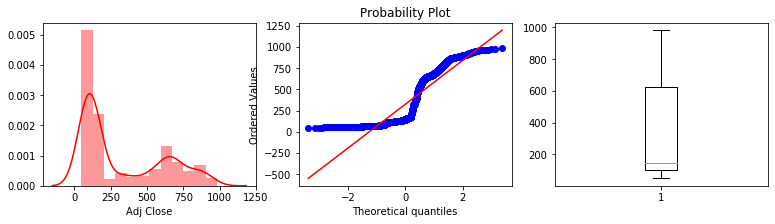

In [84]:
plot(escort_main,'Adj Close')

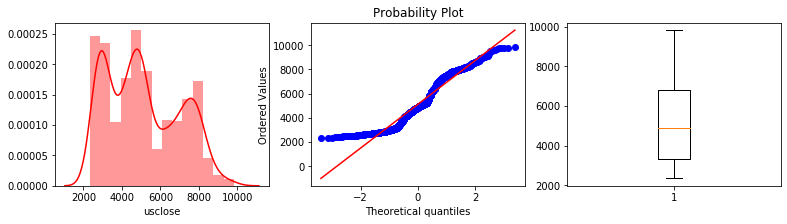

In [85]:
plot(escort_main,'usclose')

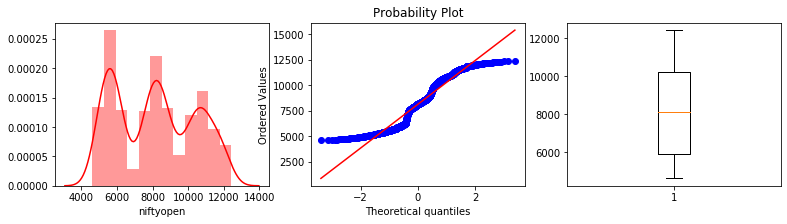

In [86]:
plot(escort_main,'niftyopen')

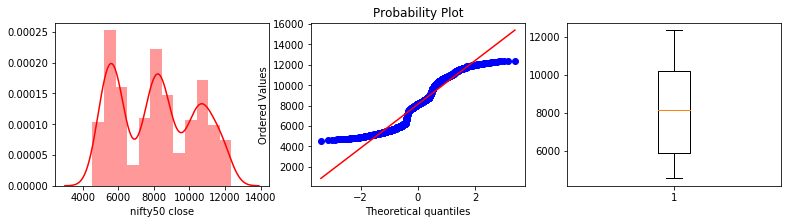

In [87]:
plot(escort_main,'nifty50 close')

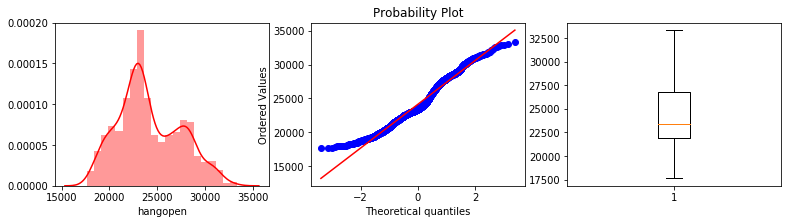

In [88]:
plot(escort_main
     ,'hangopen')

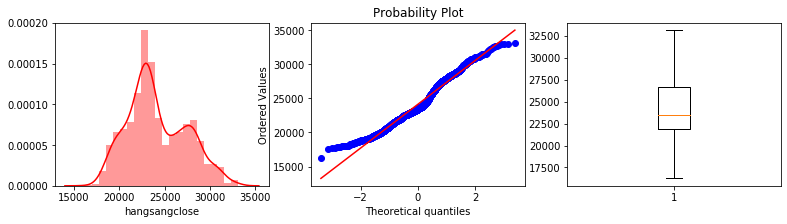

In [89]:
plot(escort_main,'hangsangclose')


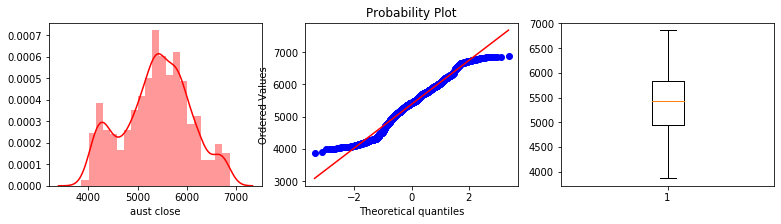

In [90]:
plot(escort_main,'aust close')

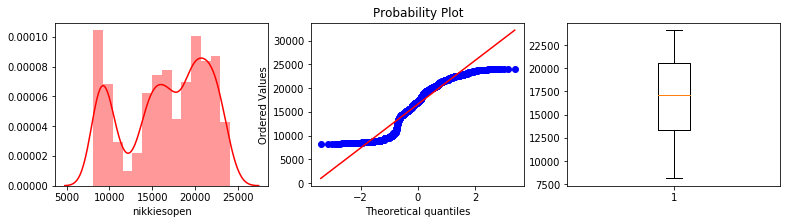

In [91]:
plot(escort_main,"nikkiesopen")

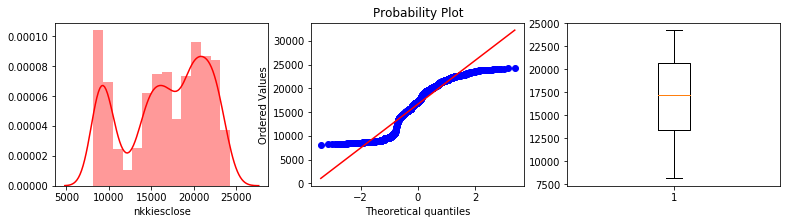

In [92]:
plot(escort_main,"nkkiesclose")

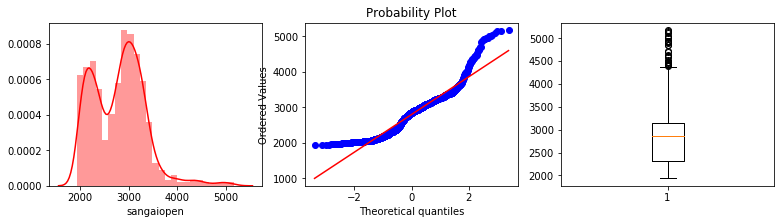

In [93]:
plot(escort_main,'sangaiopen')

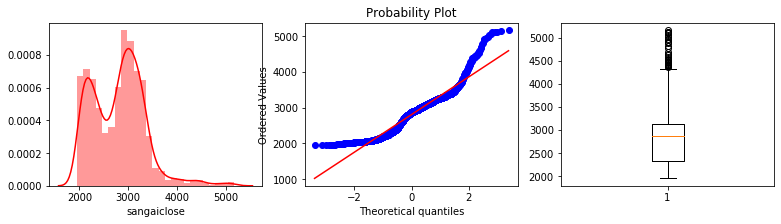

In [94]:

plot(escort_main,'sangaiclose')

In [95]:
escort_main = escort_main.drop(["Date"],axis = 1)

AS IT CAN BE CLEARLY SEEN THAT OUTLIERS ARE PRESENT IN SOME FEATURES, SINCE LINEAR MODELS ARE SUSEPTABLE TO OUTLIERS WHICH CAN HAVE NEGATIVE IMPACT ON FINDING BEST FIT LINE SO IT IS ALWAYS BETTER TO REMOVE OUTLIERS.

In [96]:
def outlierhandle(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [97]:
for column in escort_main.columns:
    lr,ur=outlierhandle(escort_main[column])
    escort_main[column]=np.where(escort_main[column]>ur,ur,escort_main[column])
    escort_main[column]=np.where(escort_main[column]<lr,lr,escort_main[column])

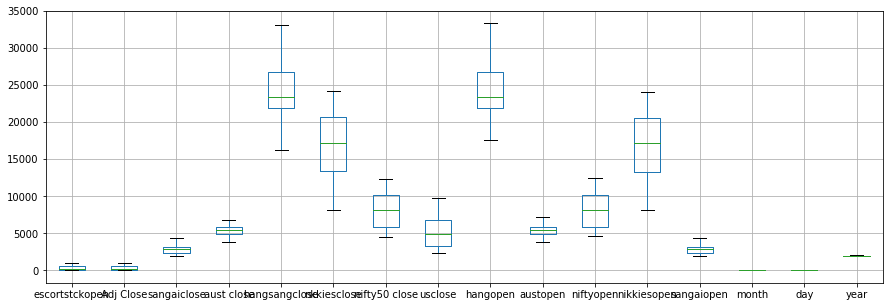

In [98]:
escort_main.boxplot(figsize=(15,5))

In [99]:
escort_main.head()

,escortstckopen,Adj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen,month,day,year
0,182.399994,165.670425,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102,4.0,1.0,2011.0
1,179.800003,163.068283,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967,5.0,1.0,2011.0
2,168.750000,153.527023,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059,6.0,1.0,2011.0
3,164.050003,147.135773,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039,7.0,1.0,2011.0
4,157.000000,141.338013,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074,11.0,1.0,2011.0


In [100]:
escort_main.columns

Index(['escortstckopen', 'Adj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen',
       'austopen', 'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day',
       'year'],
      dtype='object')



LETS DRAW SCATTERPLOT TO SEE THE RELEATIONSHIPS BETWEEN INDEPENDENT AND DEPENDENT VARIABLES.

In [101]:
#sns.pairplot(escort_main,diag_kind='kde')

# FEATURE SELECTION AND MODEL BUILDING

LINEAR MODEL WILL BE BUILD FIRST AS MOST OF THE FEATURES ARE LINEARLY CORRELATED.

LET US USE FILTER METHOD BASED ON R VALUE WHICH WORKS ON BAISIS OF FINDING THE SUM OF AREAS OF RECTANGLES FROMED IN THE FUR QUDRANTS  ALSO CALLED PEARSONS CORRELATION.

In [102]:
correlation = escort_main.corr()
correlation

,escortstckopen,Adj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen,month,day,year
escortstckopen,1.000000,0.998989,0.362379,0.746411,0.829958,0.781974,0.871183,0.890990,0.826844,0.750584,0.872419,0.781174,0.394615,0.004140,-0.023243,0.846553
Adj Close,0.998989,1.000000,0.362770,0.752284,0.830325,0.786361,0.875306,0.895782,0.827529,0.755533,0.876548,0.785766,0.395083,0.005758,-0.022417,0.851872
sangaiclose,0.362379,0.362770,1.000000,0.457233,0.477039,0.593489,0.522358,0.450547,0.475990,0.460020,0.524630,0.590949,0.936966,-0.051148,-0.013473,0.474495
aust close,0.746411,0.752284,0.457233,1.000000,0.778563,0.908585,0.900108,0.914102,0.780474,0.945352,0.902137,0.908733,0.461348,0.016846,-0.007647,0.891087
hangsangclose,0.829958,0.830325,0.477039,0.778563,1.000000,0.791346,0.821044,0.802716,0.988571,0.810904,0.823448,0.789236,0.505453,-0.038251,-0.026048,0.730449
nkkiesclose,0.781974,0.786361,0.593489,0.908585,0.791346,1.000000,0.926501,0.923849,0.791231,0.911908,0.929353,0.987083,0.608180,0.042434,-0.010678,0.921728
nifty50 close,0.871183,0.875306,0.522358,0.900108,0.821044,0.926501,1.000000,0.974355,0.821063,0.919701,0.993561,0.927866,0.527534,0.034309,-0.009943,0.952186
usclose,0.890990,0.895782,0.450547,0.914102,0.802716,0.923849,0.974355,1.000000,0.802868,0.920281,0.975657,0.925328,0.473383,0.027152,-0.008286,0.971908
hangopen,0.826844,0.827529,0.475990,0.780474,0.988571,0.791231,0.821063,0.802868,1.000000,0.812793,0.823180,0.793164,0.516334,-0.040702,-0.026783,0.726710
austopen,0.750584,0.755533,0.460020,0.945352,0.810904,0.911908,0.919701,0.920281,0.812793,1.000000,0.922703,0.913831,0.460732,-0.002274,-0.014583,0.887839


In [103]:
cortarget = abs(correlation["escortstckopen"])
features = cortarget[cortarget>0.7]
features

escortstckopen    1.000000
Adj Close         0.998989
aust close        0.746411
hangsangclose     0.829958
nkkiesclose       0.781974
nifty50 close     0.871183
usclose           0.890990
hangopen          0.826844
austopen          0.750584
niftyopen         0.872419
nikkiesopen       0.781174
year              0.846553
Name: escortstckopen, dtype: float64

SINCE R VALUE DEFINES THE LINEAR RELATIONSHIPS BETWEEN FEATURES AND MORE THAN 0.7 VALUE IS CONSIDERED TO BE BETTER.

In [104]:
Y = escort_main['escortstckopen']

To avoid the problem of multicolinearity droping highely correlated independent features is better while bulding the model.

In [105]:
X= escort_main.drop(['sangaiopen','sangaiclose','escortstckopen','hangopen','niftyopen','austopen','nikkiesopen','day','month','year'] , axis=1)

In [106]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)

# Linear Regression(Grid search CV for finding best hyperparameters).

In [107]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
print("r2 / variance : ", grid.best_score_)
print("bestparameters : ", grid.best_params_)


r2 / variance :  0.9981743559401594
bestparameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [108]:
X_test

,Adj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose
794,154.263412,5375.799805,23333.17969,15329.910160,7748.200195,4466.750000
857,123.479355,5364.799805,24679.75977,18004.769530,8797.400391,4650.470215
720,139.156555,5519.500000,22880.64063,15095.000000,7542.100098,4247.950195
737,119.695122,5402.000000,23387.14063,15284.419920,7585.000000,4350.350098
899,129.606766,5950.799805,27827.69922,20058.949220,8448.099609,4994.600098
...,...,...,...,...,...,...
489,60.649082,5129.500000,23493.02930,15627.259770,5980.450195,3299.129883
262,70.874992,4280.600098,20780.73047,9667.259766,5207.450195,3080.500000
360,57.417709,4361.299805,20601.92969,9110.000000,5435.350098,3136.419922
1286,416.751404,5753.299805,23925.05078,19633.750000,8926.900391,5860.629883


In [109]:
y_pred = grid.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("the mean absolute error is:",mean_absolute_error(y_test,y_pred))
mse_linear = mean_squared_error(y_pred,y_test)
print("the meansquared error is:",mse_linear)

the mean absolute error is: 2.652524272503789
the meansquared error is: 26.529074469463872


In [111]:
 prediction = grid.predict(X_train)

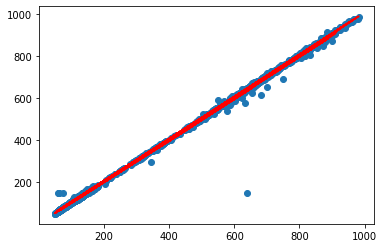

In [112]:
plt.scatter(X_train["Adj Close"],y_train)
plt.plot(X_train["Adj Close"], prediction, color='red')


In [113]:
yhat = grid.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.9979852222026118 0.9979787018861154


In [114]:
y_pred = grid.predict(X_test)

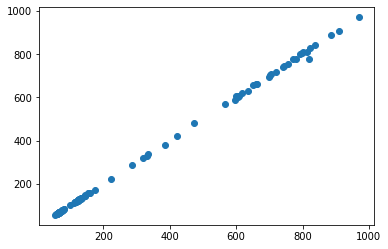

In [115]:
plt.scatter(y_test, y_pred)

In [116]:
X_test["predictedstock"] = y_pred

In [117]:
X_test["actualstock"] = y_test

In [118]:
X_test

,Adj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,predictedstock,actualstock
794,154.263412,5375.799805,23333.17969,15329.910160,7748.200195,4466.750000,157.534670,159.250000
857,123.479355,5364.799805,24679.75977,18004.769530,8797.400391,4650.470215,127.980318,126.349998
720,139.156555,5519.500000,22880.64063,15095.000000,7542.100098,4247.950195,141.960251,143.399994
737,119.695122,5402.000000,23387.14063,15284.419920,7585.000000,4350.350098,122.762859,123.000000
899,129.606766,5950.799805,27827.69922,20058.949220,8448.099609,4994.600098,133.079599,133.600006
...,...,...,...,...,...,...,...,...
489,60.649082,5129.500000,23493.02930,15627.259770,5980.450195,3299.129883,66.516904,63.099998
262,70.874992,4280.600098,20780.73047,9667.259766,5207.450195,3080.500000,77.110344,75.650002
360,57.417709,4361.299805,20601.92969,9110.000000,5435.350098,3136.419922,62.921564,61.799999
1286,416.751404,5753.299805,23925.05078,19633.750000,8926.900391,5860.629883,419.381223,422.299988


In [119]:
mselinear = mean_squared_error(X_test["predictedstock"],X_test["actualstock"])
print("The mean sqaured error is:",mselinear)

The mean sqaured error is: 26.529074469463872


In [120]:
test = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/testlive/ESCORTSlive.csv")
test.head(20)

,Date,escortopen,Adj Close,sanghaiclose,sanghaiopen,niftyopen,niftyClose,nikkiesopen,nikkies Close,usopen,usclose,hangsangopen,hangsangClose,austopen,austclose
0,08-04-2020,653.700012,663.750000,2820.762939,2805.916992,8688.900391,8792.200195,19047.75977,18950.17969,7975.720215,7887.259766,24191.32031,24253.28906,5252.299805,5252.299805
1,13-04-2020,684.299988,684.299988,2796.631000,2784.597900,9103.950195,9111.900391,19312.03906,19498.50000,8127.689941,8153.580078,24185.32400,24300.30000,5488.100100,5387.299805
2,16-04-2020,710.000000,714.700012,2811.174072,2798.429932,8851.250000,8925.299805,19311.30078,19550.08984,8479.110352,8393.179688,24025.44922,24145.33984,5466.700195,5466.700195
3,22-04-2020,722.000000,725.099976,2827.012939,2814.065918,9026.750000,8981.450195,19109.17969,19280.77930,8434.549805,8263.230469,23540.53906,23793.55078,5221.299805,5221.299805
4,23-04-2020,751.900024,749.750000,2843.979980,2850.510010,9232.349609,9187.299805,19313.03906,19137.94922,8528.839844,8495.379883,23983.65039,23893.35938,5221.200195,5221.200195
5,24-04-2020,744.000000,752.200012,2838.499023,2834.938965,9163.900391,9313.900391,19331.85938,19429.43945,8530.080078,8494.750000,23844.55078,23977.32031,5217.100098,5217.100098
6,28-04-2020,713.799988,709.099976,2815.495117,2819.990967,9389.799805,9282.299805,19776.17969,19783.22070,8825.690430,8730.160156,24401.11914,24280.14063,5321.399902,5321.399902
7,29-04-2020,715.000000,709.150024,2810.023926,2801.383057,9408.599609,9380.900391,19946.43900,19785.34560,8802.700195,8607.730469,24786.01953,24575.96094,5313.100098,5313.100098
8,06-05-2020,697.900024,692.349976,2822.441895,2831.633057,9226.799805,9205.599609,19999.89760,19619.98000,8874.700195,8809.120117,24137.48047,23868.66016,5407.100098,5407.100098
9,07-05-2020,720.000000,715.599976,2878.139893,2876.472900,9234.049805,9270.900391,19468.51953,19619.34961,8973.780273,8854.389648,24120.81055,24137.48047,5384.600098,5384.600098


In [121]:
teststock_open = test["escortopen"]


In [122]:
date = test["Date"]

In [123]:
test = test.drop(['Date','escortopen','sanghaiclose','sanghaiopen','hangsangopen','niftyopen','nikkiesopen','usopen','austopen'],axis = 1)

In [124]:
test.head()

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195


In [125]:
predlive = grid.predict(test)
predlive

array([663.4552024 , 683.04959649, 714.22959408, 724.90267135,
       749.10738749, 751.35296221, 708.00800059, 707.87353199,
       690.75143676, 714.27173567, 749.51047975, 754.97285175,
       794.51950204, 823.95360545, 837.24861574, 868.77318439,
       882.63266093, 910.69660787])

In [126]:
test["actual_live_price"] = teststock_open 

In [127]:
test["predicted_live_linear"] = predlive

In [128]:
test

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose,actual_live_price,predicted_live_linear
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805,653.700012,663.455202
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805,684.299988,683.049596
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195,710.000000,714.229594
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805,722.000000,724.902671
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195,751.900024,749.107387
5,752.200012,9313.900391,19429.43945,8494.750000,23977.32031,5217.100098,744.000000,751.352962
6,709.099976,9282.299805,19783.22070,8730.160156,24280.14063,5321.399902,713.799988,708.008001
7,709.150024,9380.900391,19785.34560,8607.730469,24575.96094,5313.100098,715.000000,707.873532
8,692.349976,9205.599609,19619.98000,8809.120117,23868.66016,5407.100098,697.900024,690.751437
9,715.599976,9270.900391,19619.34961,8854.389648,24137.48047,5384.600098,720.000000,714.271736


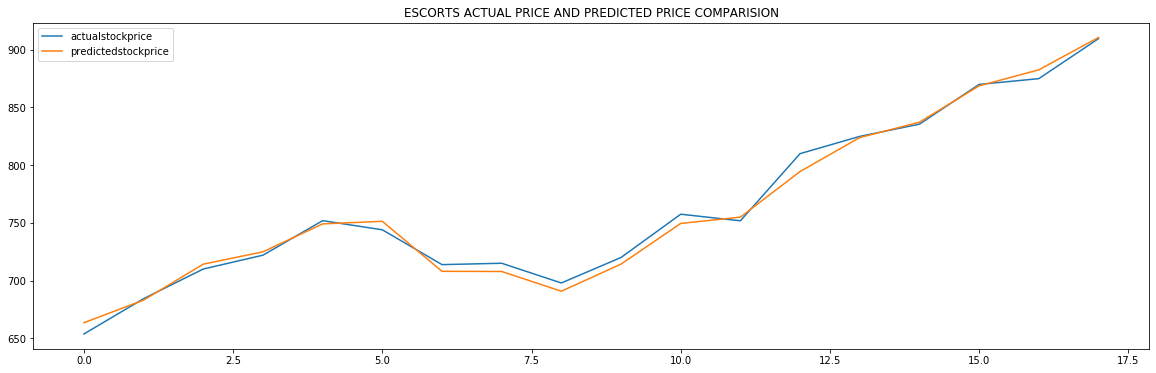

In [129]:
plt.figure(figsize = (20,6))
plt.plot(test["actual_live_price"])
plt.plot(test["predicted_live_linear"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("ESCORTS ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# Model building using ridge and lasso regression

In [130]:
from sklearn.linear_model import Lasso,Ridge

In [131]:
X_test

,Adj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,predictedstock,actualstock
794,154.263412,5375.799805,23333.17969,15329.910160,7748.200195,4466.750000,157.534670,159.250000
857,123.479355,5364.799805,24679.75977,18004.769530,8797.400391,4650.470215,127.980318,126.349998
720,139.156555,5519.500000,22880.64063,15095.000000,7542.100098,4247.950195,141.960251,143.399994
737,119.695122,5402.000000,23387.14063,15284.419920,7585.000000,4350.350098,122.762859,123.000000
899,129.606766,5950.799805,27827.69922,20058.949220,8448.099609,4994.600098,133.079599,133.600006
...,...,...,...,...,...,...,...,...
489,60.649082,5129.500000,23493.02930,15627.259770,5980.450195,3299.129883,66.516904,63.099998
262,70.874992,4280.600098,20780.73047,9667.259766,5207.450195,3080.500000,77.110344,75.650002
360,57.417709,4361.299805,20601.92969,9110.000000,5435.350098,3136.419922,62.921564,61.799999
1286,416.751404,5753.299805,23925.05078,19633.750000,8926.900391,5860.629883,419.381223,422.299988


In [132]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000000)
parameters={'alpha':[0.000001,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'random_state':[1,56,42,35,550],'normalize':[True,False]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=20)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'normalize': [True, False],
                         'random_state': [1, 56, 42, 35, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5, 'normalize': False, 'random_state': 1}
0.9981480437784895


In [134]:
lasso=Lasso(max_iter=100000000,alpha= 5, normalize=False, random_state= 1)
lasso.fit(X_train,y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=100000000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
x_test_lasso = X_test.drop(["predictedstock","actualstock"],axis = 1)

In [136]:
predlasso = lasso.predict(x_test_lasso)

In [137]:
mean_squared_error(predlasso,y_test)

26.574306334727357

In [138]:
test_lasso = test.drop(['actual_live_price','predicted_live_linear'],axis = 1)

In [139]:
predlive_lasso = lasso.predict(test_lasso)

In [140]:
test["predictedlasso"] = predlive_lasso

In [141]:
test #

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose,actual_live_price,predicted_live_linear,predictedlasso
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805,653.700012,663.455202,662.330615
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805,684.299988,683.049596,681.929613
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195,710.000000,714.229594,713.117358
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805,722.000000,724.902671,723.762939
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195,751.900024,749.107387,747.938216
5,752.200012,9313.900391,19429.43945,8494.750000,23977.32031,5217.100098,744.000000,751.352962,750.179161
6,709.099976,9282.299805,19783.22070,8730.160156,24280.14063,5321.399902,713.799988,708.008001,706.860313
7,709.150024,9380.900391,19785.34560,8607.730469,24575.96094,5313.100098,715.000000,707.873532,706.707179
8,692.349976,9205.599609,19619.98000,8809.120117,23868.66016,5407.100098,697.900024,690.751437,689.645676
9,715.599976,9270.900391,19619.34961,8854.389648,24137.48047,5384.600098,720.000000,714.271736,713.133563


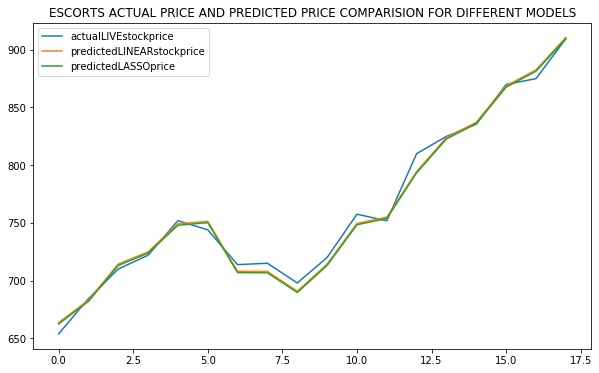

In [142]:
plt.figure(figsize = (10,6))
plt.plot(test["actual_live_price"])
plt.plot(test["predicted_live_linear"])
plt.plot(test["predictedlasso"])
plt.legend(['actualLIVEstockprice','predictedLINEARstockprice','predictedLASSOprice'], loc='upper left')
plt.title("ESCORTS ACTUAL PRICE AND PREDICTED PRICE COMPARISION FOR DIFFERENT MODELS")
plt.show()

In [143]:
from sklearn.linear_model import Ridge
parameters={'alpha':[0.00000002,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'random_state':[1,56,42,35,550],'normalize':[True,False]}
ridge  = Ridge(max_iter=10000000)
ridge_regressor=GridSearchCV(ridge,parameters,cv=20)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000, normalize=False,
                             random_state=None, solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [2e-08, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'normalize': [True, False],
                         'random_state': [1, 56, 42, 35, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100, 'normalize': False, 'random_state': 1}
0.9981480115626262


In [145]:
ridge = Ridge(max_iter=10,alpha=100, normalize=False, random_state= 1,fit_intercept=False)
ridge.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=False, max_iter=10, normalize=False,
      random_state=1, solver='auto', tol=0.001)

In [146]:
x_test_ridge = X_test.drop(["predictedstock","actualstock"],axis = 1)

In [147]:
pred = ridge.predict(x_test_ridge)

In [148]:
mean_squared_error(pred,y_test)

26.43694772800089

In [149]:
test_ridge = test.drop(['actual_live_price','predicted_live_linear','predictedlasso'],axis = 1)

In [150]:
predlive_ridge = ridge.predict(test_ridge)

In [151]:
test["predictedridge"] = predlive_ridge

In [152]:
test

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose,actual_live_price,predicted_live_linear,predictedlasso,predictedridge
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805,653.700012,663.455202,662.330615,675.436067
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805,684.299988,683.049596,681.929613,695.733270
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195,710.000000,714.229594,713.117358,726.308825
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805,722.000000,724.902671,723.762939,737.144351
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195,751.900024,749.107387,747.938216,761.748808
5,752.200012,9313.900391,19429.43945,8494.750000,23977.32031,5217.100098,744.000000,751.352962,750.179161,764.374776
6,709.099976,9282.299805,19783.22070,8730.160156,24280.14063,5321.399902,713.799988,708.008001,706.860313,721.061287
7,709.150024,9380.900391,19785.34560,8607.730469,24575.96094,5313.100098,715.000000,707.873532,706.707179,721.262834
8,692.349976,9205.599609,19619.98000,8809.120117,23868.66016,5407.100098,697.900024,690.751437,689.645676,703.426476
9,715.599976,9270.900391,19619.34961,8854.389648,24137.48047,5384.600098,720.000000,714.271736,713.133563,727.147452


# VOTING BASED ENSEMBLE TECHNIQUE

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

In [154]:
escort_main.columns

Index(['escortstckopen', 'Adj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'hangopen',
       'austopen', 'niftyopen', 'nikkiesopen', 'sangaiopen', 'month', 'day',
       'year'],
      dtype='object')

In [155]:
escort_main = escort_main.drop(['sangaiclose','niftyopen','nikkiesopen','hangopen','day','month','year','austopen','sangaiopen'],axis=1)

In [156]:
Y = escort_main["escortstckopen"]

In [157]:
X = escort_main.drop(["escortstckopen"],axis = 1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)

In [159]:
kfold = model_selection.KFold(n_splits=10,random_state= 50)

# Tuning Hyperparameters

In [160]:
estimator = []
model1 = LinearRegression(normalize=False,fit_intercept=False,n_jobs=-1)
estimator.append(('Linear',model1))
model2 = Ridge(alpha=0.0000001,
    fit_intercept=True,
    normalize=True,
    copy_X=True,
    max_iter=100000,
    tol=0.000001,
    solver='cholesky',
    random_state=35)
estimator.append(('ridge',model2))
model3 = DecisionTreeRegressor(max_depth=15)
estimator.append(('desiciontree',model3))

In [161]:
#creating ensemble model
ensemble = VotingRegressor(estimator)
result = model_selection.cross_val_score(ensemble,X_train,y_train,cv =kfold)

In [162]:
result.mean()

0.9975556961796863

In [163]:
ensemble=ensemble.fit(X_train,y_train)

In [164]:
predic_value=ensemble.predict(X_test)
predic_value

array([157.36803785, 127.4290706 , 142.63470121, 122.77396169,
       133.2603524 , 581.14964848, 660.50251365, 967.74169877,
        55.5704432 , 905.57716893, 753.58481959,  61.6637653 ,
        63.11174204,  72.73308054, 117.52930791, 601.04782284,
       148.16880919, 317.40547215, 112.13079767,  66.36330177,
        61.575112  ,  63.9991519 ,  67.42958889,  69.28011155,
       103.1278956 , 337.19427398, 628.35486726, 126.29941134,
        70.45394974, 601.49324997, 117.90502086, 777.06446643,
       221.85654961, 284.69714308, 172.99446354, 124.9614618 ,
       572.82213722, 665.83109269,  61.9734728 , 843.34382512,
       695.8844148 , 737.1336268 , 655.3654278 , 135.88028322,
        69.11838244, 146.46226836,  78.51763889, 748.05754676,
       805.6115625 , 718.67622382, 128.19128463, 887.69915478,
       600.16919183, 120.39293161, 607.08156388, 126.56715294,
       124.16092424, 776.44573255,  66.22053933, 701.34690979,
       100.09559985, 380.39362964, 157.73683154,  65.68

In [165]:
(mean_squared_error(predic_value,y_test))**0.5

5.709539100237363

In [169]:
test.columns

Index(['Adj Close', 'niftyClose', 'nikkies Close', 'usclose', 'hangsangClose',
       'austclose', 'actual_live_price', 'predicted_live_linear',
       'predictedlasso', 'predictedridge'],
      dtype='object')

In [170]:
test_ensemble = test.drop(['actual_live_price','predicted_live_linear','predictedlasso','predictedridge'],axis=1)

In [171]:
pred_live_ensemble = ensemble.predict(test_ensemble)

In [172]:
(mean_squared_error(pred_live_ensemble,teststock_open))**0.5

10.252520633311573

In [173]:
test["predicted_ensemble"] = pred_live_ensemble

In [174]:
test

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose,actual_live_price,predicted_live_linear,predictedlasso,predictedridge,predicted_ensemble
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805,653.700012,663.455202,662.330615,675.436067,651.632635
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805,684.299988,683.049596,681.929613,695.733270,664.929917
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195,710.000000,714.229594,713.117358,726.308825,720.848384
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805,722.000000,724.902671,723.762939,737.144351,731.151379
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195,751.900024,749.107387,747.938216,761.748808,756.137884
5,752.200012,9313.900391,19429.43945,8494.750000,23977.32031,5217.100098,744.000000,751.352962,750.179161,764.374776,758.645112
6,709.099976,9282.299805,19783.22070,8730.160156,24280.14063,5321.399902,713.799988,708.008001,706.860313,721.061287,716.358840
7,709.150024,9380.900391,19785.34560,8607.730469,24575.96094,5313.100098,715.000000,707.873532,706.707179,721.262834,716.381244
8,692.349976,9205.599609,19619.98000,8809.120117,23868.66016,5407.100098,697.900024,690.751437,689.645676,703.426476,682.061633
9,715.599976,9270.900391,19619.34961,8854.389648,24137.48047,5384.600098,720.000000,714.271736,713.133563,727.147452,721.142132


# Adaboost Regressor with base estimator as linear regression

In [175]:
from sklearn.ensemble import AdaBoostRegressor

# Getting best hyperparameters

In [176]:
param = {"n_estimators":[10,20,30,40,50, 60,36],"learning_rate":[0.00000002,1e-10,1e-8,1e-3,1e-2],"loss":['linear','square','exponential']}
adamodel =AdaBoostRegressor(base_estimator=LinearRegression(normalize=True))
gridada = GridSearchCV(adamodel,param,cv=5)
gridada.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=True),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [2e-08, 1e-10, 1e-08, 0.001, 0.01],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 36]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [177]:
print(gridada.best_params_)
print(gridada.best_score_)

{'learning_rate': 1e-10, 'loss': 'linear', 'n_estimators': 36}
0.9980283107544942


In [178]:
adamodel =AdaBoostRegressor(base_estimator=Ridge(),learning_rate=2e-08, loss= 'linear', n_estimators= 10)

In [179]:
adamodel.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1.0, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=2e-08, loss='linear', n_estimators=10,
                  random_state=None)

In [180]:
predada = adamodel.predict(X_test)

In [181]:
mean_squared_error(predada,y_test)

25.939540957571168

In [182]:
test_ada = test.drop(['actual_live_price','predicted_live_linear','predictedlasso','predictedridge','predicted_ensemble'],axis = 1)

In [183]:
predada = adamodel.predict(test_ada)

In [184]:
test["adaboost_pred"] = predada

In [185]:
test

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose,actual_live_price,predicted_live_linear,predictedlasso,predictedridge,predicted_ensemble,adaboost_pred
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805,653.700012,663.455202,662.330615,675.436067,651.632635,664.824339
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805,684.299988,683.049596,681.929613,695.733270,664.929917,684.831074
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195,710.000000,714.229594,713.117358,726.308825,720.848384,715.815978
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805,722.000000,724.902671,723.762939,737.144351,731.151379,726.676573
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195,751.900024,749.107387,747.938216,761.748808,756.137884,750.736282
5,752.200012,9313.900391,19429.43945,8494.750000,23977.32031,5217.100098,744.000000,751.352962,750.179161,764.374776,758.645112,752.922019
6,709.099976,9282.299805,19783.22070,8730.160156,24280.14063,5321.399902,713.799988,708.008001,706.860313,721.061287,716.358840,709.748915
7,709.150024,9380.900391,19785.34560,8607.730469,24575.96094,5313.100098,715.000000,707.873532,706.707179,721.262834,716.381244,709.640451
8,692.349976,9205.599609,19619.98000,8809.120117,23868.66016,5407.100098,697.900024,690.751437,689.645676,703.426476,682.061633,692.389790
9,715.599976,9270.900391,19619.34961,8854.389648,24137.48047,5384.600098,720.000000,714.271736,713.133563,727.147452,721.142132,715.943891


In [186]:
test["Date"] = date
test

,Adj Close,niftyClose,nikkies Close,usclose,hangsangClose,austclose,actual_live_price,predicted_live_linear,predictedlasso,predictedridge,predicted_ensemble,adaboost_pred,Date
0,663.750000,8792.200195,18950.17969,7887.259766,24253.28906,5252.299805,653.700012,663.455202,662.330615,675.436067,651.632635,664.824339,08-04-2020
1,684.299988,9111.900391,19498.50000,8153.580078,24300.30000,5387.299805,684.299988,683.049596,681.929613,695.733270,664.929917,684.831074,13-04-2020
2,714.700012,8925.299805,19550.08984,8393.179688,24145.33984,5466.700195,710.000000,714.229594,713.117358,726.308825,720.848384,715.815978,16-04-2020
3,725.099976,8981.450195,19280.77930,8263.230469,23793.55078,5221.299805,722.000000,724.902671,723.762939,737.144351,731.151379,726.676573,22-04-2020
4,749.750000,9187.299805,19137.94922,8495.379883,23893.35938,5221.200195,751.900024,749.107387,747.938216,761.748808,756.137884,750.736282,23-04-2020
5,752.200012,9313.900391,19429.43945,8494.750000,23977.32031,5217.100098,744.000000,751.352962,750.179161,764.374776,758.645112,752.922019,24-04-2020
6,709.099976,9282.299805,19783.22070,8730.160156,24280.14063,5321.399902,713.799988,708.008001,706.860313,721.061287,716.358840,709.748915,28-04-2020
7,709.150024,9380.900391,19785.34560,8607.730469,24575.96094,5313.100098,715.000000,707.873532,706.707179,721.262834,716.381244,709.640451,29-04-2020
8,692.349976,9205.599609,19619.98000,8809.120117,23868.66016,5407.100098,697.900024,690.751437,689.645676,703.426476,682.061633,692.389790,06-05-2020
9,715.599976,9270.900391,19619.34961,8854.389648,24137.48047,5384.600098,720.000000,714.271736,713.133563,727.147452,721.142132,715.943891,07-05-2020


In [187]:
print("The root mean square of linearmodel is:",(((test['actual_live_price']-test['predicted_live_linear'])**2)**0.5).mean())
print("The root mean square of lassomodel is:",(((test['actual_live_price']-test['predictedlasso'])**2)**0.5).mean())
print("The root mean square of ridge is:",(((test['actual_live_price']-test['predictedridge'])**2)**0.5).mean())
print("The root mean square of ensemble is:",(((test['actual_live_price']-test['predicted_ensemble'])**2)**0.5).mean())
print("The root mean square of adaboost is:",(((test['actual_live_price']-test['adaboost_pred'])**2)**0.5).mean())


The root mean square of linearmodel is: 5.184596096059693
The root mean square of lassomodel is: 5.321542073207215
The root mean square of ridge is: 11.860135757434856
The root mean square of ensemble is: 7.934233495971398
The root mean square of adaboost is: 5.125548507702679


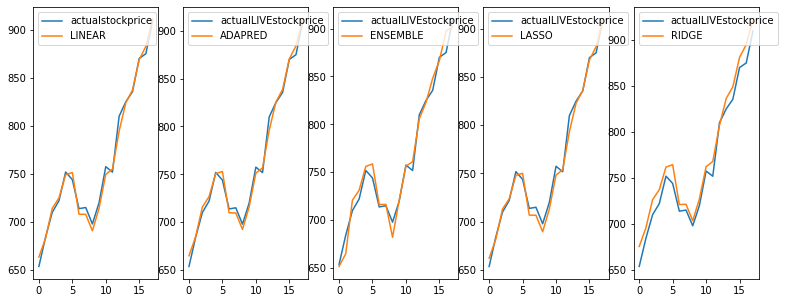

In [188]:
#COMPARSION BETWEEN ADABOOST AND 
plt.figure(figsize = (13,5))
plt.subplot(1,5,1)
plt.plot(test["actual_live_price"])
plt.plot(test["predicted_live_linear"])
plt.legend(['actualstockprice','LINEAR'], loc='upper left')
#plt.title("ESCORTS ACTUAL PRICE AND LINEAR PREDICTION COMPARISION")
plt.subplot(1,5,2)
plt.plot(test["actual_live_price"])
plt.plot(test["adaboost_pred"])
plt.legend(['actualLIVEstockprice','ADAPRED'], loc='upper left')
#plt.title("ESCORTS ACTUAL PRICE AND ADABOOST PREDICTION COMPARISION")
#plt.show()
plt.subplot(1,5,3)
plt.plot(test["actual_live_price"])
plt.plot(test["predicted_ensemble"])
plt.legend(['actualLIVEstockprice','ENSEMBLE'], loc='upper left')
#plt.title("ESCORTS ACTUAL PRICE AND ENSEMBLE PREDICTION COMPARISION")
#plt.show()
plt.subplot(1,5,4)
plt.plot(test["actual_live_price"])
plt.plot(test["predictedlasso"])
plt.legend(['actualLIVEstockprice','LASSO'], loc='upper left')
#plt.title("ESCORTS ACTUAL PRICE AND ENSEMBLE PREDICTION COMPARISION")
plt.subplot(1,5,5)
plt.plot(test["actual_live_price"])
plt.plot(test["predictedridge"])
plt.legend(['actualLIVEstockprice','RIDGE'], loc='upper left')
plt.show()

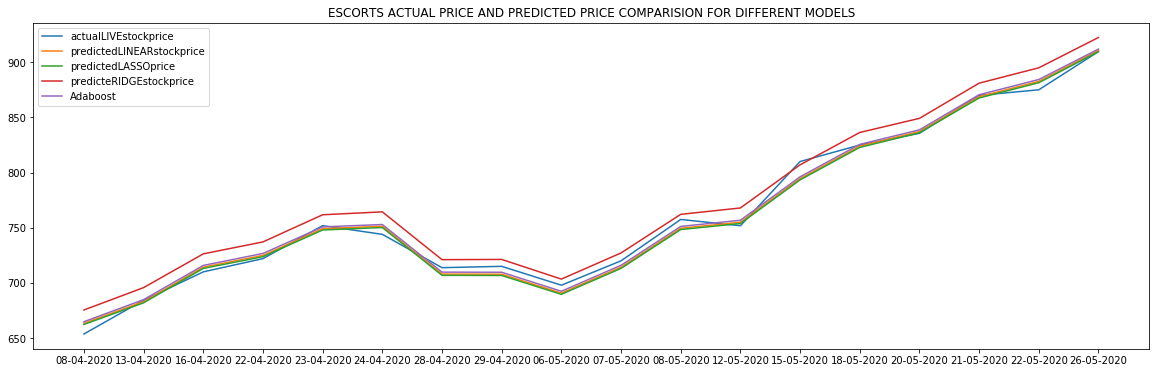

In [189]:
plt.figure(figsize = (20,6))
plt.plot(test["Date"],test["actual_live_price"],label ='actual_live_price' )
plt.plot(test["Date"],test["predicted_live_linear"],label = 'predicted_live_linear')
plt.plot(test["Date"],test["predictedlasso"],label = 'predictedlasso')
plt.plot(test["Date"],test["predictedridge"],label = 'predictedridge')
plt.plot(test["Date"],test["adaboost_pred"],label = 'adaboost_pred')
plt.legend(['actualLIVEstockprice','predictedLINEARstockprice','predictedLASSOprice','predicteRIDGEstockprice','Adaboost'], loc='upper left')
plt.title("ESCORTS ACTUAL PRICE AND PREDICTED PRICE COMPARISION FOR DIFFERENT MODELS")
plt.show()

In [ ]:
import pickle
pickle.dump(grid,open('model.pickle','wb'))
model = pickle.load(open('model.pickle','rb'))

# IT CAN BE CLEARLY SEEN THAT THE LATEST(MAY AND APRIL)ACTUAL AND PREDICTED VALUES ALMOST MATCHES AND ADABOOST IS HAPPENED TO BE THE BEST ALGORTHM TO GET THE EXACT SOLUTION.


# =================code file ends here==========================